In [ ]:
 git config --get remote.origin.url

In [2]:
import os
import zipfile


path_to_zip_file = os.getcwd() + '\\web-traffic-time-series-forecasting.zip'
directory_to_extract_to = os.getcwd()
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [2]:
!dir

 Volume in drive E is WorkSpace
 Volume Serial Number is 6AD8-FF46

 Directory of E:\Fad\Advpy\apps\web_traffic_prediction

04/13/2021  06:42 PM    <DIR>          .
04/13/2021  06:42 PM    <DIR>          ..
04/13/2021  05:40 PM    <DIR>          .ipynb_checkpoints
04/13/2021  06:42 PM       100,611,606 key_1.csv.zip
04/13/2021  06:42 PM       105,675,137 key_2.csv.zip
04/13/2021  05:52 PM         2,592,254 notebooks.rar
04/13/2021  06:42 PM        69,191,855 sample_submission_1.csv.zip
04/13/2021  06:42 PM        71,498,241 sample_submission_2.csv.zip
04/13/2021  05:52 PM            65,187 stockprice-master.zip
04/13/2021  05:40 PM           228,711 timeseries.ipynb
04/13/2021  06:42 PM       107,403,305 train_1.csv.zip
04/13/2021  06:42 PM       157,467,909 train_2.csv.zip
04/13/2021  05:42 PM       611,829,090 web-traffic-time-series-forecasting.zip
              10 File(s)  1,226,563,295 bytes
               3 Dir(s)  31,826,280,448 bytes free


In [6]:
path_to_zip_file = os.getcwd() + '\\train_1.csv.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [4]:
path_to_zip_file = os.getcwd() + '\\train_2.csv.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [5]:
!dir

 Volume in drive E is WorkSpace
 Volume Serial Number is 6AD8-FF46

 Directory of E:\Fad\Advpy\apps\web_traffic_prediction

04/13/2021  06:44 PM    <DIR>          .
04/13/2021  06:44 PM    <DIR>          ..
04/13/2021  05:40 PM    <DIR>          .ipynb_checkpoints
04/13/2021  06:42 PM       100,611,606 key_1.csv.zip
04/13/2021  06:42 PM       105,675,137 key_2.csv.zip
04/13/2021  05:52 PM         2,592,254 notebooks.rar
04/13/2021  06:42 PM        69,191,855 sample_submission_1.csv.zip
04/13/2021  06:42 PM        71,498,241 sample_submission_2.csv.zip
04/13/2021  05:52 PM            65,187 stockprice-master.zip
04/13/2021  06:44 PM           229,170 timeseries.ipynb
04/13/2021  06:44 PM       278,011,802 train_1.csv
04/13/2021  06:42 PM       107,403,305 train_1.csv.zip
04/13/2021  06:44 PM       406,966,413 train_2.csv
04/13/2021  06:42 PM       157,467,909 train_2.csv.zip
04/13/2021  05:42 PM       611,829,090 web-traffic-time-series-forecasting.zip
              12 File(s)  1,911,54

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df_train1 = pd.read_csv('train_1.csv',header='infer' )
df_train1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
len(df_train1)

145063

In [ ]:
df_train2 = pd.read_csv('train_2.csv',header='infer' )
df_train2.head()

In [11]:
len(df_train2)

145063

In [10]:
df_train1.T.head()

,0,1,2,3,4,5,6,7,8,9,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_al...,Legión_(serie_de_televisión)_es.wikipedia.org_...,Doble_tentación_es.wikipedia.org_all-access_sp...,Mi_adorable_maldición_es.wikipedia.org_all-acc...,Underworld_(serie_de_películas)_es.wikipedia.o...,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,Francisco_el_matemático_(serie_de_televisión_d...
2015-07-01,18,11,1,35,NaN,12,NaN,118,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11,14,0,13,NaN,7,NaN,26,23,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5,15,1,10,NaN,4,NaN,30,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13,18,1,94,NaN,5,NaN,24,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_train1.T.tail()

,0,1,2,3,4,5,6,7,8,9,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
2016-12-27,20,30,4,11,11,19,4,23,30,29,...,8,7,4,NaN,NaN,12,NaN,NaN,NaN,NaN
2016-12-28,22,52,6,17,27,23,15,32,36,35,...,21,13,2,NaN,NaN,13,NaN,NaN,NaN,NaN
2016-12-29,19,45,3,19,13,17,6,39,38,44,...,14,12,4,NaN,NaN,3,NaN,NaN,NaN,NaN
2016-12-30,18,26,4,10,36,17,8,32,31,26,...,24,31,4,NaN,NaN,5,NaN,NaN,NaN,NaN
2016-12-31,20,20,17,11,10,50,6,17,97,41,...,37,11,3,51,NaN,10,NaN,NaN,NaN,NaN


In [14]:
df_train2.T.head()

,0,1,2,3,4,5,6,7,8,9,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_al...,Legión_(serie_de_televisión)_es.wikipedia.org_...,Doble_tentación_es.wikipedia.org_all-access_sp...,Mi_adorable_maldición_es.wikipedia.org_all-acc...,Underworld_(serie_de_películas)_es.wikipedia.o...,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,Francisco_el_matemático_(serie_de_televisión_d...
2015-07-01,18,11,1,35,NaN,12,NaN,118,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11,14,0,13,NaN,7,NaN,26,23,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5,15,1,10,NaN,4,NaN,30,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13,18,1,94,NaN,5,NaN,24,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_train2.T.tail()

,0,1,2,3,4,5,6,7,8,9,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
2017-09-06,27,25,7,16,23,20,10,44,44,32,...,2,4,5,19,8,2,5,13,8,2
2017-09-07,29,26,3,19,28,18,8,25,33,34,...,0,8,3,7,7,4,5,9,2,7
2017-09-08,23,23,4,30,14,17,5,39,52,29,...,5,7,4,14,9,4,2,21,4,6
2017-09-09,54,13,7,38,8,14,3,25,21,23,...,7,7,3,12,11,8,2,16,3,10
2017-09-10,38,81,6,4,7,11,5,50,48,25,...,1,19,3,8,5,2,4,6,3,3


df_train1 and df_train2 are the same. Therefore, we focus on one only.

In [4]:
df = df_train1.T

In [5]:
df_train1.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_al...,Legión_(serie_de_televisión)_es.wikipedia.org_...,Doble_tentación_es.wikipedia.org_all-access_sp...,Mi_adorable_maldición_es.wikipedia.org_all-acc...,Underworld_(serie_de_películas)_es.wikipedia.o...,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,Francisco_el_matemático_(serie_de_televisión_d...
2015-07-01,18,11,1,35,NaN,12,NaN,118,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11,14,0,13,NaN,7,NaN,26,23,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5,15,1,10,NaN,4,NaN,30,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13,18,1,94,NaN,5,NaN,24,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns = df.iloc[0]

In [17]:
len(df)

550

In [9]:
df.drop(df.index[0], inplace=True)

In [10]:
df.columns

Index(['2NE1_zh.wikipedia.org_all-access_spider',
       '2PM_zh.wikipedia.org_all-access_spider',
       '3C_zh.wikipedia.org_all-access_spider',
       '4minute_zh.wikipedia.org_all-access_spider',
       '52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider',
       '5566_zh.wikipedia.org_all-access_spider',
       '91Days_zh.wikipedia.org_all-access_spider',
       'A'N'D_zh.wikipedia.org_all-access_spider',
       'AKB48_zh.wikipedia.org_all-access_spider',
       'ASCII_zh.wikipedia.org_all-access_spider',
       ...
       'Drake_(músico)_es.wikipedia.org_all-access_spider',
       'Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       'Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       'Doble_tentación_es.wikipedia.org_all-access_spider',
       'Mi_adorable_maldición_es.wikipedia.org_all-access_spider',
       'Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider',
       'Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-ac

In [11]:
df.index

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [ ]:
df[]

In [20]:
df.rename({'Page': 'Dates'}, axis=1, inplace=True)
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [21]:
df.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
2015-07-01,18,11,1,35,NaN,12,NaN,118,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11,14,0,13,NaN,7,NaN,26,23,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5,15,1,10,NaN,4,NaN,30,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13,18,1,94,NaN,5,NaN,24,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14,11,0,4,NaN,20,NaN,29,9,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# MemoryError: Unable to allocate 609. MiB for an array with shape (145063, 550) and data type object
# df = df.rename(columns = {'Page': 'Dates'})
df.index.names = ['Date']

In [23]:
df.columns

Index(['2NE1_zh.wikipedia.org_all-access_spider',
       '2PM_zh.wikipedia.org_all-access_spider',
       '3C_zh.wikipedia.org_all-access_spider',
       '4minute_zh.wikipedia.org_all-access_spider',
       '52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider',
       '5566_zh.wikipedia.org_all-access_spider',
       '91Days_zh.wikipedia.org_all-access_spider',
       'A'N'D_zh.wikipedia.org_all-access_spider',
       'AKB48_zh.wikipedia.org_all-access_spider',
       'ASCII_zh.wikipedia.org_all-access_spider',
       ...
       'Drake_(músico)_es.wikipedia.org_all-access_spider',
       'Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       'Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       'Doble_tentación_es.wikipedia.org_all-access_spider',
       'Mi_adorable_maldición_es.wikipedia.org_all-access_spider',
       'Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider',
       'Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-ac

In [24]:
df.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18,11,1,35,NaN,12,NaN,118,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11,14,0,13,NaN,7,NaN,26,23,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5,15,1,10,NaN,4,NaN,30,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13,18,1,94,NaN,5,NaN,24,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14,11,0,4,NaN,20,NaN,29,9,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df['date_idx']= pd.to_datetime(df.index, infer_datetime_format=True)

In [26]:
df['date_idx'].dtype.name

'datetime64[ns]'

In [27]:
df.index.dtype.name

'object'

In [28]:
df.columns

Index(['2NE1_zh.wikipedia.org_all-access_spider',
       '2PM_zh.wikipedia.org_all-access_spider',
       '3C_zh.wikipedia.org_all-access_spider',
       '4minute_zh.wikipedia.org_all-access_spider',
       '52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider',
       '5566_zh.wikipedia.org_all-access_spider',
       '91Days_zh.wikipedia.org_all-access_spider',
       'A'N'D_zh.wikipedia.org_all-access_spider',
       'AKB48_zh.wikipedia.org_all-access_spider',
       'ASCII_zh.wikipedia.org_all-access_spider',
       ...
       'Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       'Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider',
       'Doble_tentación_es.wikipedia.org_all-access_spider',
       'Mi_adorable_maldición_es.wikipedia.org_all-access_spider',
       'Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider',
       'Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider',
       'Enamorándome_de_Ramón_es.wikipedia.org

In [33]:
# df.set_index('date_idx', drop=True, inplace=True )

In [30]:
columns_to_keep = ['2NE1_zh.wikipedia.org_all-access_spider','date_idx' ]
df_2NE1 = df[columns_to_keep]

In [31]:
df_2NE1.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,date_idx
Date,,
2015-07-01,18,2015-07-01
2015-07-02,11,2015-07-02
2015-07-03,5,2015-07-03
2015-07-04,13,2015-07-04
2015-07-05,14,2015-07-05


In [32]:
df_2NE1.reset_index(inplace=True, drop=True)

In [39]:
df_2NE1.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,date_idx
0,18,2015-07-01
1,11,2015-07-02
2,5,2015-07-03
3,13,2015-07-04
4,14,2015-07-05


In [40]:
df_2NE1.to_csv('DF_2NE1.CSV')


In [45]:
df_ne = pd.read_csv('DF_2NE1.CSV', infer_datetime_format=True )

In [46]:
df_ne.head()

,2NE1_zh.wikipedia.org_all-access_spider,date_idx
0,18,7/1/2015
1,11,7/2/2015
2,5,7/3/2015
3,13,7/4/2015
4,14,7/5/2015


In [48]:
df_ne.dtypes

2NE1_zh.wikipedia.org_all-access_spider     int64
date_idx                                   object
dtype: object

In [49]:
# df_2NE1.drop('Page', axis=1, inplace=True)
# df_2NE1.head()

In [22]:
df.fillna(0, inplace=True)

In [23]:
df['total'] = df.sum(axis=1)
columns_to_keep = ['total']
df_final = df[columns_to_keep]
df_final.head()

Page,total
date_idx,
2015-07-01,148672476.0
2015-07-02,149593840.0
2015-07-03,141164198.0
2015-07-04,145612937.0
2015-07-05,151495372.0


In [102]:
# columns_to_keep = ['2NE1_zh.wikipedia.org_all-access_spider', '2PM_zh.wikipedia.org_all-access_spider', '52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider']
# df_tmp1 = df[columns_to_keep]

In [95]:
# df_tmp1.head()

In [96]:
# df_tmp1.index

In [97]:
# df_tmp1.sum(axis=1)

In [89]:
# df_g = df.groupby(df.index).sum()
# df_g = df[:10].groupby('date_idx').sum()
# df_g = df[:2].reset_index().groupby('date_idx').sum()

In [90]:
# df_g

In [91]:
# df2 = df.reset_index()
# df2.head()

In [92]:
# df2[:1].groupby('date_idx').sum()

In [93]:
# df.index

In [24]:
# import math

In [25]:
# dict_list = []
# dict_aux = {}
# counter = 0
# for idx in df.index:
#     if counter >= 2:
#         break
#     dict_aux['idx'] = idx
#     sum_var = 0
#     for col in df.columns:
#         if math. isnan(df.loc[idx, col]):
#             sum_var += 0
#         else:
#             sum_var += df.loc[idx, col]
#     dict_aux['val'] = sum_var
#     dict_list.append(dict_aux)
#     counter += 1
#     if counter >= 2:
#         break;

In [99]:
# dict_aux

In [98]:
# dict_list

In [100]:
# df[['2NE1_zh.wikipedia.org_all-access_spider']]

In [101]:
# df.loc[row_indexer,column_indexer]
# df.loc['2015-07-01','2NE1_zh.wikipedia.org_all-access_spider']

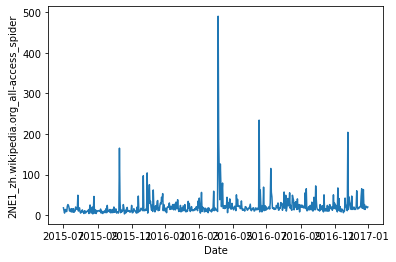

In [37]:
plt.xlabel('Date')
plt.ylabel('2NE1_zh.wikipedia.org_all-access_spider')
plt.plot(df[['2NE1_zh.wikipedia.org_all-access_spider']])

In [ ]:
#### We can aggregate over months
# df.groupby(by=[b.index.month, b.index.year])
# # or
# df.groupby(pd.Grouper(freq='M'))

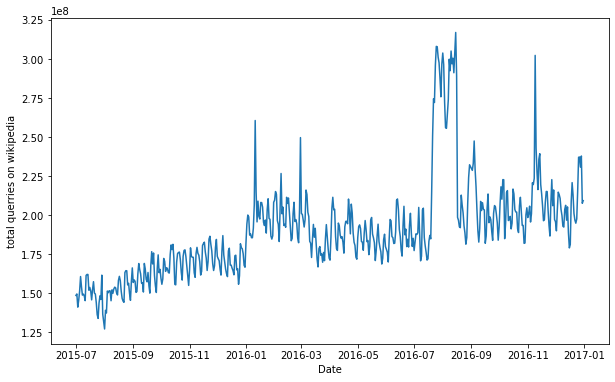

In [37]:
import matplotlib


plt.xlabel('Date')
plt.ylabel('total querries on wikipedia')
# plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
# plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
# plt.gcf().autofmt_xdate()
# plt.margins(x=0,y=0)
plt.plot(df_final)

In [38]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [47]:
# df_final.groupby(pd.Grouper(freq='M'))

In [41]:
df_final.index.month

Int64Index([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date_idx', length=550)

In [42]:
df_final.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='date_idx', length=550)

In [65]:
df_tmp2 = df_final.groupby(by=[df_final.index.year, df_final.index.month], sort=True, squeeze=True).sum()
df_tmp2
# .sort(by=df_final.index.year)

Page                      total
date_idx date_idx              
2015     7         4.624660e+09
         8         4.703810e+09
         9         4.842070e+09
         10        5.216496e+09
         11        5.212680e+09
         12        5.271047e+09
2016     1         6.169012e+09
         2         5.840166e+09
         3         5.773984e+09
         4         5.713062e+09
         5         5.718609e+09
         6         5.650500e+09
         7         6.894738e+09
         8         7.663871e+09
         9         6.125943e+09
         10        6.257218e+09
         11        6.435197e+09
         12        6.386156e+09

In [66]:
df_tmp2.columns

Index(['total'], dtype='object', name='Page')

In [54]:
df_tmp2.index

MultiIndex([(2015,  7),
            (2015,  8),
            (2015,  9),
            (2015, 10),
            (2015, 11),
            (2015, 12),
            (2016,  1),
            (2016,  2),
            (2016,  3),
            (2016,  4),
            (2016,  5),
            (2016,  6),
            (2016,  7),
            (2016,  8),
            (2016,  9),
            (2016, 10),
            (2016, 11),
            (2016, 12)],
           names=['date_idx', 'date_idx'])

In [57]:
df_tmp2.index.get_level_values(0)

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016,
            2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='date_idx')

In [56]:
df_tmp2.index.get_level_values(1)

Int64Index([7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='date_idx')

In [60]:
df_tmp2.index.get_level_values(0).rename('year', inplace=True)

In [62]:
df_tmp2.index.get_level_values(1).rename('month', inplace=True)

In [63]:
df_tmp2.head()

Page                      total
date_idx date_idx              
2015     7         4.624660e+09
         8         4.703810e+09
         9         4.842070e+09
         10        5.216496e+09
         11        5.212680e+09

In [69]:
df_tmp2.to_csv('df_temp.csv')

In [64]:
df_tmp2.reset_index()

ValueError: cannot insert date_idx, already exists

#### As the dataframe is quite big, I need to sometimes manually call the garbage collector. To do so I use the function written at [here](https://stackoverflow.com/questions/49515085/python-garbage-collection-sometimes-not-working-in-jupyter-notebook).

In [14]:
def my_reset(*varnames):
    """
    varnames are what you want to keep
    """
    globals_ = globals()
    to_save = {v: globals_[v] for v in varnames}
    to_save['my_reset'] = my_reset  # lets keep this function by default
    del globals_
    get_ipython().magic("reset")
    globals().update(to_save)